# **Logistic Regression Model on Target Variable**

### **Importing The Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sb
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/P&S/P&S Assignment Material /Neo 1.xlsx'

data = pd.read_excel(path)
data.sample(10)

,Name,absolute_magnitude_h,is_potentially_hazardous_asteroid,is_sentry_object,kilometers_estimated_diameter_min,kilometers_estimated_diameter_max,mean_esitmated_diameter(Km),orbit_class_type,perihelion_distance,aphelion_distance,first_observation_year,last_observation_year
6859,TF8,26.50,False,False,0.013322,0.029788,0.021555,APO,0.977460,2.288427,2009,2009
1399,,19.05,True,False,0.411675,0.920534,0.666105,APO,0.861239,1.708212,1999,2021
18365,NH2,23.10,False,False,0.063761,0.142574,0.103167,AMO,1.041844,2.439213,2018,2018
1201,,18.73,False,False,0.477040,1.066694,0.771867,ATE,0.473718,1.166185,1992,2021
13964,ER155,22.00,False,False,0.105817,0.236614,0.171215,AMO,1.253888,3.156911,2016,2016
12227,DV180,19.60,False,False,0.319562,0.714562,0.517062,AMO,1.141595,2.782559,2015,2018
15951,GP4,26.10,False,False,0.016016,0.035813,0.025914,APO,0.857930,2.989278,2017,2017
14097,GD),26.40,False,False,0.013949,0.031192,0.022571,AMO,1.031464,2.048721,2016,2016
10098,PW31,22.80,False,False,0.073207,0.163697,0.118452,AMO,1.111101,3.571241,2013,2013
5933,FH5,27.00,False,False,0.010582,0.023661,0.017122,APO,0.940865,2.979710,2008,2008


In [ ]:
data = data.dropna()
data.isna().sum()

Name                                 0
absolute_magnitude_h                 0
is_potentially_hazardous_asteroid    0
is_sentry_object                     0
kilometers_estimated_diameter_min    0
kilometers_estimated_diameter_max    0
mean_esitmated_diameter(Km)          0
orbit_class_type                     0
perihelion_distance                  0
aphelion_distance                    0
first_observation_year               0
last_observation_year                0
dtype: int64

In [ ]:
df = data.drop(['kilometers_estimated_diameter_min', 'kilometers_estimated_diameter_max'], axis=1)
df.sample(10)

,Name,absolute_magnitude_h,is_potentially_hazardous_asteroid,is_sentry_object,mean_esitmated_diameter(Km),orbit_class_type,perihelion_distance,aphelion_distance,first_observation_year,last_observation_year
7284,HA),23.9,False,False,0.247481,ATE,0.771849,1.147615,2010,2011
17331,YW),26.7,False,False,0.019658,AMO,1.033095,4.390452,2017,2017
1385,,19.3,False,False,0.593667,AMO,1.027079,2.366221,2001,2022
17079,VY14,24.9,False,False,0.045034,AMO,1.070542,2.253755,2017,2017
8441,TK5,22.8,False,False,0.118452,ATE,0.483181,1.223793,2011,2011
8184,HD24,25.5,False,False,0.034162,APO,0.432740,3.972818,2011,2011
18339,NQ),22.2,False,False,0.156150,APO,0.506626,2.938410,2018,2018
9244,ST9,19.7,False,False,0.493790,APO,0.660298,3.258356,2001,2013
19855,GR2,20.3,False,False,0.374578,AMO,1.252481,2.266616,2017,2019
9628,AS72,24.0,False,False,0.068162,APO,1.010578,3.297903,2013,2013


## **Logistic Regression Assumptions**

To perform binary logistic regression:


*   It is essential that the dependent variable is binary and that the level 1 of the dependent
variable signifies the intended outcome.


*   It is imperative to include only the relevant variables and ensure that the independent
variables are not highly correlated, that is, multicollinearity should be minimized.


*   Additionally, the independent variables should exhibit a linear relationship with the log odds,
and a substantial sample size is required for logistic regression to be effective.


Given these assumptions, we can now examine our dataset



### **1. Preprocessing or Data cleaning**

In [ ]:
df.dtypes


Name                                  object
absolute_magnitude_h                 float64
is_potentially_hazardous_asteroid       bool
is_sentry_object                        bool
mean_esitmated_diameter(Km)          float64
orbit_class_type                      object
perihelion_distance                  float64
aphelion_distance                    float64
first_observation_year                 int64
last_observation_year                  int64
dtype: object

In [ ]:
df_x = df.drop('is_potentially_hazardous_asteroid', axis=1)
cat_cols= list(df_x.select_dtypes(include=['object', 'bool']).columns)
cat_df=[]
for cat_col in cat_cols:
 df_cate = cat_col,df[cat_col].drop_duplicates()
 cat_df.append(df_cate)
cat_df[0]

('Name',
 0               Midas 
 1         Baboquivari 
 2                Anza 
 3                Aten 
 4             Bacchus 
              ...      
 23973              TR8
 23974              TV8
 23975              TW8
 23976              TB9
 23977              TG9
 Name: Name, Length: 13162, dtype: object)

In [ ]:
cat_cols

['Name', 'is_sentry_object', 'orbit_class_type']

The above datafarme gives you the list of values within each categorical columns. From the
columns



### **2. Data Exploration**

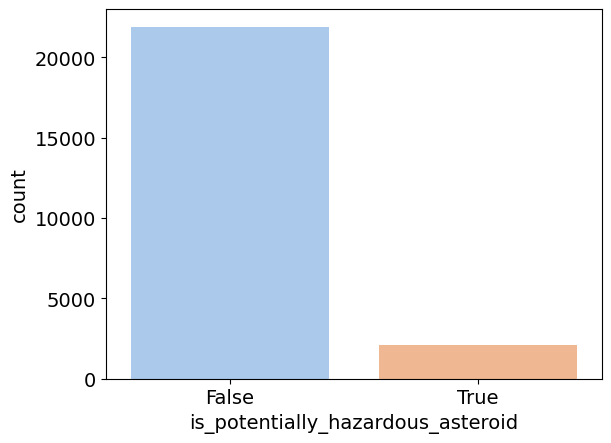

In [ ]:
df['is_potentially_hazardous_asteroid'].value_counts()

sb.countplot(x="is_potentially_hazardous_asteroid",data=df,palette='pastel')
plt.show()



*   **There is an Imbalance in the Target Variable**



**Mean on numerical columns**

In [ ]:
df.groupby('is_potentially_hazardous_asteroid').mean()


,absolute_magnitude_h,is_sentry_object,mean_esitmated_diameter(Km),perihelion_distance,aphelion_distance,first_observation_year,last_observation_year
is_potentially_hazardous_asteroid,,,,,,,
False,23.214641,0.048193,0.245776,0.930009,2.639732,2012.337033,2016.041889
True,20.095130,0.005256,0.539886,0.760181,2.796903,2006.540373,2017.763975


**Mean on categorical column**

In [ ]:
df.groupby('orbit_class_type').mean()


,absolute_magnitude_h,is_potentially_hazardous_asteroid,is_sentry_object,mean_esitmated_diameter(Km),perihelion_distance,aphelion_distance,first_observation_year,last_observation_year
orbit_class_type,,,,,,,,
AMO,22.116989,0.013239,0.002244,0.327991,1.129295,3.000329,2011.288343,2016.318524
APO,23.369733,0.135509,0.070474,0.246228,0.813852,2.625729,2012.177053,2016.059219
ATE,23.929078,0.096685,0.062431,0.169503,0.607773,1.169294,2011.987293,2016.502210
IEO,19.025909,0.272727,0.000000,0.921174,0.446980,0.904965,2010.772727,2019.500000


### **3. Convert the categorical variables into dummy binaries**

In [ ]:
data=df.drop('Name', axis=1)


In [ ]:
cat_vars=['is_sentry_object', 'orbit_class_type']
for var in cat_vars:
 cat_list='var'+'_'+var
 cat_list = pd.get_dummies(data[var], prefix=var)
 data1=data.join(cat_list)
 data=data1
cat_vars=['is_sentry_object', 'orbit_class_type']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]


In [ ]:
df.columns

Index(['Name', 'absolute_magnitude_h', 'is_potentially_hazardous_asteroid',
       'is_sentry_object', 'mean_esitmated_diameter(Km)', 'orbit_class_type',
       'perihelion_distance', 'aphelion_distance', 'first_observation_year',
       'last_observation_year'],
      dtype='object')

Our final data columns will be:

In [ ]:
data_final=data[to_keep]
print(data_final.columns.values)


['absolute_magnitude_h' 'is_potentially_hazardous_asteroid'
 'mean_esitmated_diameter(Km)' 'perihelion_distance' 'aphelion_distance'
 'first_observation_year' 'last_observation_year' 'is_sentry_object_False'
 'is_sentry_object_True' 'orbit_class_type_AMO' 'orbit_class_type_APO'
 'orbit_class_type_ATE' 'orbit_class_type_IEO']


In [ ]:
print(len(data_final.columns.values))

13


### **4. Over-sampling to overcome the sample imbalance**

After constructing our training data,


*   I will apply the SMOTE algorithm (Synthetic Minority Oversampling Technique) to upsample the no-subscription class
*   Essentially, SMOTE functions by generating artificial samples of the underrepresented
class instead of duplicating existing ones


*   This is accomplished by selecting one of the k-nearest-neighbors at random and utilizing it
to produce a comparable but randomly modified new instance

*   Our implementation of SMOTE will take place in Python.






In [ ]:
X = data_final.loc[:, data_final.columns != 'is_potentially_hazardous_asteroid']
y = data_final.loc[:, data_final.columns == 'is_potentially_hazardous_asteroid']
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
# os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
# os_data_y= pd.DataFrame(data=os_data_y)


**The data after performing SMOTE for balancing**


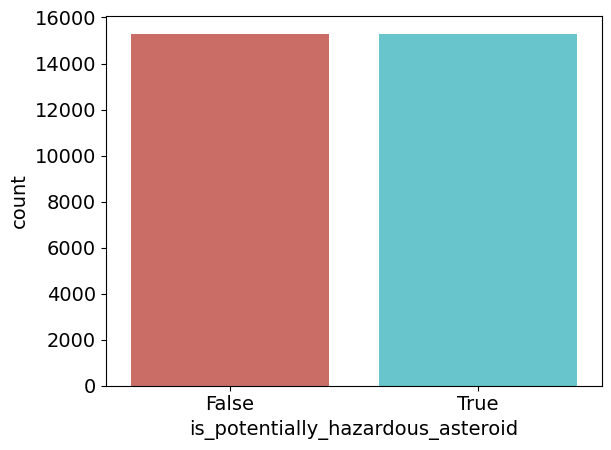

is_potentially_hazardous_asteroid
False                                15295
True                                 15295
dtype: int64

In [ ]:
sb.countplot(data = os_data_y,x='is_potentially_hazardous_asteroid',palette='hls')
plt.show()

os_data_y.value_counts()



*   We now have an ideally balanced dataset!
*   I applied oversampling to the training data.
*   This was done intentionally to prevent information from the test data being utilized in creating synthetic instances.
*   By only oversampling the training data, we ensure that no information is transferred from the test data to the model training process.





### **5. Construct the model with the best performing feature**

**How can we choose the best performing feature?**



*   One way to do so is by using **Recursive feature elimination** method (Readmore:
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html
(https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html))

*   The Recursive Feature Elimination (RFE) algorithm operates by constructing a model multiple times and selecting the best or worst performing feature in each iteration


*   The chosen feature is then removed from the dataset, and the process is repeated with the remaining features
*   This recursive process continues until all features in the dataset have been evaluated


*   The primary objective of RFE is to choose features by iteratively considering smaller and smaller subsets of features








In [ ]:
data_final_vars=data_final.columns.values.tolist()
y =['is_potentially_hazardous_asteroid']
X =[i for i in data_final_vars if i not in y]
logreg = LogisticRegression()
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=8)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

[ True  True False False False False  True  True  True  True  True  True]
[1 1 4 5 3 2 1 1 1 1 1 1]


In [ ]:
os_data_X[os_data_X.columns[rfe.support_].tolist()].columns


Index(['absolute_magnitude_h', 'mean_esitmated_diameter(Km)',
       'is_sentry_object_False', 'is_sentry_object_True',
       'orbit_class_type_AMO', 'orbit_class_type_APO', 'orbit_class_type_ATE',
       'orbit_class_type_IEO'],
      dtype='object')

In [ ]:
X = os_data_X[os_data_X.columns[rfe.support_].tolist()]
y = os_data_y['is_potentially_hazardous_asteroid']


In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())


Optimization terminated successfully.
         Current function value: 0.360824
         Iterations 9
                                  Results: Logit
Model:              Logit                             Pseudo R-squared: 0.479     
Dependent Variable: is_potentially_hazardous_asteroid AIC:              22091.2226
Date:               2023-04-02 07:31                  BIC:              22157.8500
No. Observations:   30590                             Log-Likelihood:   -11038.   
Df Model:           7                                 LL-Null:          -21203.   
Df Residuals:       30582                             LLR p-value:      0.0000    
Converged:          1.0000                            Scale:            1.0000    
No. Iterations:     9.0000                                                        
-----------------------------------------------------------------------------------
                               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-----------------

In [ ]:
X.shape

(30590, 8)

In [ ]:
y.shape

(30590,)

### **Logistic Model Implementation**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### **6. Model Evaluation**

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(metrics.accuracy_score(y_test, y_pred)))

Accuracy of logistic regression classifier on test set: 0.91


### **Confusion Matrix**

Confusion Matrix = 
[[3934  696]
 [ 100 4447]]


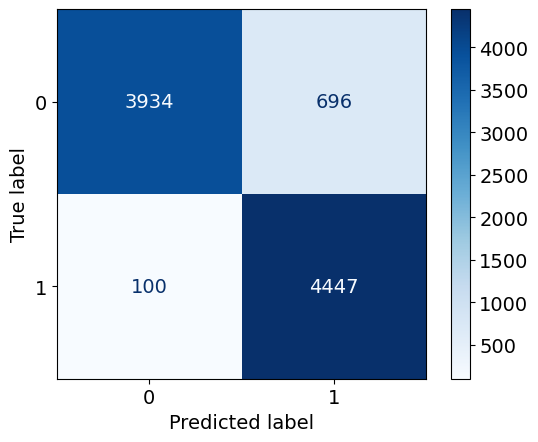

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, classification_report

print("Confusion Matrix = ")
ax = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(ax)
ConfusionMatrixDisplay(ax).plot(cmap=plt.cm.Blues)



### **Compute precision, recall, F-measure and support**


*   The **precision** is defined as tp / (tp + fp), where tp is the number of true positives and fp is the number of false positives. It represents the classifier's ability to avoid labeling negative samples as positive
*   The **recall** is calculated as tp / (tp + fn), where tp is the number of true positives and fn is the number of false negatives. It measures the classifier's ability to identify all positive samples


*   The **F-1 score** is a weighted harmonic mean of precision and recall, with the optimal value at 1 and the worst score at 0. The F-1 score assigns more weight to recall than precision, with the weight determined by the beta factor. A beta value of 1.0 indicates that recall and precision have equal importance
*   Finally, the **support** corresponds to the number of instances of each class in y_test.





In [ ]:
print("Classification report: ")
print(classification_report(y_true=y_test, y_pred=y_pred))

Classification report: 
              precision    recall  f1-score   support

       False       0.98      0.85      0.91      4630
        True       0.86      0.98      0.92      4547

    accuracy                           0.91      9177
   macro avg       0.92      0.91      0.91      9177
weighted avg       0.92      0.91      0.91      9177



### **ROC curve**

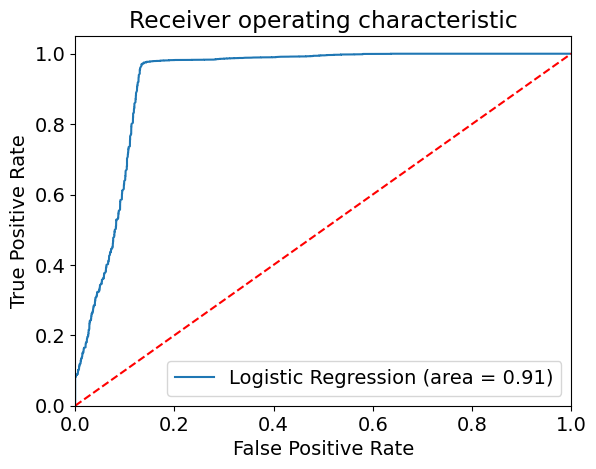

In [ ]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC_5samples_down_regulated_with_features.png')
plt.show()



*   The **ROC (Receiver Operating Characteristic)** curve is a widely used tool for evaluating binary classifiers

*   It is plotted on a graph where the dotted line represents the ROC curve of a completely random classifier

*   A reliable classifier should aim to stay as distant as possible from this line, preferably towards the top-left corner of the graph






## **Conclusions**

Prior to applying the data to the LR model, several steps were taken,


1.   Data visualization to identify the most effective predictors and the least effective predictors
2.   The imbalance in the y variable was resolved using the SMOTE method
3.  Recursive feature elimination was also conducted to select the best features that would improve the accuracy of the model







In Summary:


*   Through Feature Engineering we were able to determing the right predictors
*   Hazard potential of a Asteroid was modelled by:
1. Absolute Magnitude
2. Mean Diameter
3. Sentry Object
4. Orbit Class Type



*   Upon fitting the model we obtained an f1-score of above 90% for both instances of target classes, indicating it to be a strong model
*   ROC area = 0.91 indicates further the credibility of the model.

**The Detailed results and inferences were obtained from running this model in Minitab:**





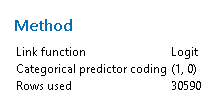

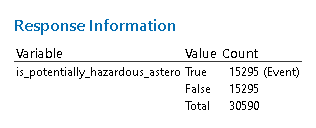

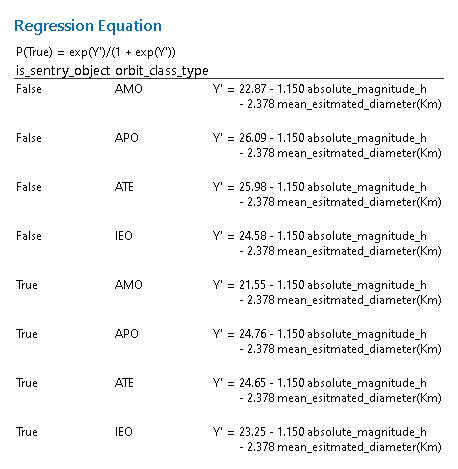

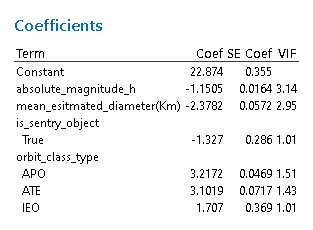

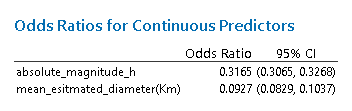

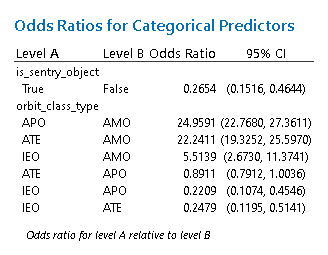

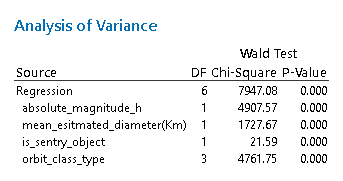

## **Extra Model preperation for Minitab Analysis**

In [ ]:
X_train

,absolute_magnitude_h,mean_esitmated_diameter(Km),is_sentry_object_False,is_sentry_object_True,orbit_class_type_AMO,orbit_class_type_APO,orbit_class_type_ATE,orbit_class_type_IEO
11770,19.000000,0.681620,1,0,0,1,0,0
16783,24.400000,0.056695,1,0,0,1,0,0
13538,24.000000,0.068162,1,0,1,0,0,0
8165,20.300000,0.374578,1,0,1,0,0,0
21379,20.200000,0.392232,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...
29802,21.114470,0.257426,1,0,0,1,0,0
5390,19.200000,0.621645,1,0,0,1,0,0
860,21.500000,0.215547,1,0,0,1,0,0
15795,23.300000,0.094090,1,0,0,1,0,0


In [ ]:
def fun1(x):
  if x == 1:
    return True
  else:
    return False


X_train['orbit_class_type_IEO']=X_train['orbit_class_type_IEO'].map(lambda x:fun1(x))
X_train

,absolute_magnitude_h,mean_esitmated_diameter(Km),is_sentry_object_False,is_sentry_object_True,orbit_class_type_AMO,orbit_class_type_APO,orbit_class_type_ATE,orbit_class_type_IEO
11770,19.000000,0.681620,True,False,False,True,False,False
16783,24.400000,0.056695,True,False,False,True,False,False
13538,24.000000,0.068162,True,False,True,False,False,False
8165,20.300000,0.374578,True,False,True,False,False,False
21379,20.200000,0.392232,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...
29802,21.114470,0.257426,True,False,False,True,False,False
5390,19.200000,0.621645,True,False,False,True,False,False
860,21.500000,0.215547,True,False,False,True,False,False
15795,23.300000,0.094090,True,False,False,True,False,False


In [ ]:
y_train

11770    False
16783    False
13538    False
8165     False
21379     True
         ...  
29802     True
5390     False
860      False
15795    False
23654     True
Name: is_potentially_hazardous_asteroid, Length: 21413, dtype: bool

In [ ]:
new_df = pd.concat([X_train, y_train], axis=1)
new_df=new_df.reset_index(drop=True)

,absolute_magnitude_h,mean_esitmated_diameter(Km),is_sentry_object_False,is_sentry_object_True,orbit_class_type_AMO,orbit_class_type_APO,orbit_class_type_ATE,orbit_class_type_IEO,is_potentially_hazardous_asteroid
0,19.000000,0.681620,True,False,False,True,False,False,False
1,24.400000,0.056695,True,False,False,True,False,False,False
2,24.000000,0.068162,True,False,True,False,False,False,False
3,20.300000,0.374578,True,False,True,False,False,False,False
4,20.200000,0.392232,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...
21408,21.114470,0.257426,True,False,False,True,False,False,True
21409,19.200000,0.621645,True,False,False,True,False,False,False
21410,21.500000,0.215547,True,False,False,True,False,False,False
21411,23.300000,0.094090,True,False,False,True,False,False,False


In [ ]:
new_df.to_csv("/content/drive/MyDrive/P&S/P&S Assignment Material /Neo_final_data.csv", index=False)

In [ ]:
data

,absolute_magnitude_h,is_potentially_hazardous_asteroid,is_sentry_object,mean_esitmated_diameter(Km),orbit_class_type,perihelion_distance,aphelion_distance,first_observation_year,last_observation_year,is_sentry_object_False,is_sentry_object_True,orbit_class_type_AMO,orbit_class_type_APO,orbit_class_type_ATE,orbit_class_type_IEO
0,15.22,True,False,3.886356,APO,0.621512,2.931360,1973,2021,1,0,0,1,0,0
1,15.97,False,False,2.751330,AMO,1.238537,4.047945,1963,2021,1,0,1,0,0,0
2,16.36,False,False,2.299019,AMO,1.050403,3.478155,1960,2021,1,0,1,0,0,0
3,17.10,False,False,1.635094,ATE,0.790185,1.143633,1955,2019,1,0,0,0,1,0
4,17.28,False,False,1.505021,APO,0.701397,1.454804,1977,2021,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23994,26.90,False,False,0.017928,APO,0.608650,1.901363,2020,2020,1,0,0,1,0,0
23995,27.90,False,False,0.011312,APO,0.732739,1.887929,2020,2020,1,0,0,1,0,0
23996,27.20,False,False,0.015615,APO,0.788983,2.851299,2020,2020,1,0,0,1,0,0
23997,27.33,False,False,0.014708,AMO,1.045124,4.170737,2020,2020,1,0,1,0,0,0


In [ ]:
new_df = data.drop(['is_sentry_object_False', 'is_sentry_object_True', 'orbit_class_type_AMO', 'orbit_class_type_APO', 'orbit_class_type_ATE', 'orbit_class_type_IEO'], axis=1)
new_df

,absolute_magnitude_h,is_potentially_hazardous_asteroid,is_sentry_object,mean_esitmated_diameter(Km),orbit_class_type,perihelion_distance,aphelion_distance,first_observation_year,last_observation_year
0,15.22,True,False,3.886356,APO,0.621512,2.931360,1973,2021
1,15.97,False,False,2.751330,AMO,1.238537,4.047945,1963,2021
2,16.36,False,False,2.299019,AMO,1.050403,3.478155,1960,2021
3,17.10,False,False,1.635094,ATE,0.790185,1.143633,1955,2019
4,17.28,False,False,1.505021,APO,0.701397,1.454804,1977,2021
...,...,...,...,...,...,...,...,...,...
23994,26.90,False,False,0.017928,APO,0.608650,1.901363,2020,2020
23995,27.90,False,False,0.011312,APO,0.732739,1.887929,2020,2020
23996,27.20,False,False,0.015615,APO,0.788983,2.851299,2020,2020
23997,27.33,False,False,0.014708,AMO,1.045124,4.170737,2020,2020


In [ ]:

def cat_encode(x):
  if x == 'APO':
    return 0
  elif x == 'AMO':
    return 1
  elif x == 'ATE':
    return 2
  else:
    return 3

def bin_encoder(x):
  if x == True:
    return 1
  else:
    return 0


for col in new_df.columns.values:
  if new_df[col].dtypes == 'object':
    new_df[col]=new_df[col].map(lambda x:cat_encode(x))
  elif new_df[col].dtypes == 'bool':
     new_df[col]=new_df[col].map(lambda x:bin_encoder(x))


new_df

,absolute_magnitude_h,is_potentially_hazardous_asteroid,is_sentry_object,mean_esitmated_diameter(Km),orbit_class_type,perihelion_distance,aphelion_distance
0,15.22,1,0,3.886356,0,0.621512,2.931360
1,15.97,0,0,2.751330,1,1.238537,4.047945
2,16.36,0,0,2.299019,1,1.050403,3.478155
3,17.10,0,0,1.635094,2,0.790185,1.143633
4,17.28,0,0,1.505021,0,0.701397,1.454804
...,...,...,...,...,...,...,...
23994,26.90,0,0,0.017928,0,0.608650,1.901363
23995,27.90,0,0,0.011312,0,0.732739,1.887929
23996,27.20,0,0,0.015615,0,0.788983,2.851299
23997,27.33,0,0,0.014708,1,1.045124,4.170737


In [ ]:
X = new_df.loc[:, new_df.columns != 'is_potentially_hazardous_asteroid']
y = new_df.loc[:, new_df.columns == 'is_potentially_hazardous_asteroid']
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_X,os_y=os.fit_resample(X_train, y_train)

In [ ]:
new_df = pd.concat([os_X, os_y], axis=1)
new_df

,absolute_magnitude_h,is_sentry_object,mean_esitmated_diameter(Km),orbit_class_type,perihelion_distance,aphelion_distance,is_potentially_hazardous_asteroid
0,24.200000,0,0.062165,2,0.728268,1.029045,0
1,19.810000,0,0.469399,1,1.146718,1.641721,0
2,21.500000,0,0.215547,1,1.163997,4.408526,0
3,23.000000,0,0.108030,1,1.140157,3.534277,0
4,20.600000,0,0.326244,1,1.251112,3.318313,0
...,...,...,...,...,...,...,...
30585,20.200000,0,0.392232,0,0.866707,2.760843,1
30586,19.243734,0,0.609742,2,0.390149,1.333865,1
30587,14.476585,0,5.572168,0,0.845930,3.197577,1
30588,19.032984,0,0.671645,0,0.576980,4.240228,1


In [ ]:
new_df['is_potentially_hazardous_asteroid'].value_counts()

0    15295
1    15295
Name: is_potentially_hazardous_asteroid, dtype: int64

In [ ]:
def cat_decode(x):
  if x == 0:
    return 'APO'
  elif x == 1:
    return 'AMO'
  elif x == 2:
    return 'ATE'
  else:
    return 'IEO'

def bin_decoder(x):
  if x == 1:
    return True
  else:
    return False





In [ ]:
new_df['orbit_class_type']=new_df['orbit_class_type'].map(lambda x:cat_decode(x))


In [ ]:
new_df

,absolute_magnitude_h,is_sentry_object,mean_esitmated_diameter(Km),orbit_class_type,perihelion_distance,aphelion_distance,is_potentially_hazardous_asteroid
0,24.200000,False,0.062165,ATE,0.728268,1.029045,False
1,19.810000,False,0.469399,AMO,1.146718,1.641721,False
2,21.500000,False,0.215547,AMO,1.163997,4.408526,False
3,23.000000,False,0.108030,AMO,1.140157,3.534277,False
4,20.600000,False,0.326244,AMO,1.251112,3.318313,False
...,...,...,...,...,...,...,...
30585,20.200000,False,0.392232,APO,0.866707,2.760843,True
30586,19.243734,False,0.609742,ATE,0.390149,1.333865,True
30587,14.476585,False,5.572168,APO,0.845930,3.197577,True
30588,19.032984,False,0.671645,APO,0.576980,4.240228,True


In [ ]:
new_df = new_df.drop(['perihelion_distance', 'aphelion_distance'], axis=1)

In [ ]:
new_df

,absolute_magnitude_h,is_sentry_object,mean_esitmated_diameter(Km),orbit_class_type,is_potentially_hazardous_asteroid
0,24.200000,False,0.062165,ATE,False
1,19.810000,False,0.469399,AMO,False
2,21.500000,False,0.215547,AMO,False
3,23.000000,False,0.108030,AMO,False
4,20.600000,False,0.326244,AMO,False
...,...,...,...,...,...
30585,20.200000,False,0.392232,APO,True
30586,19.243734,False,0.609742,ATE,True
30587,14.476585,False,5.572168,APO,True
30588,19.032984,False,0.671645,APO,True


In [ ]:
new_df.to_csv("/content/drive/MyDrive/P&S/P&S Assignment Material /Neo_final_data.csv", index=False)